In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
path = "/content/drive/My Drive/"
os.chdir(path)

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot
import tensorflow as tf
import cv2

In [0]:
import pickle
def load_pickled_data(file, columns):
    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda c: dataset[c], columns))

First we load the images, to have a glance of the whole datasets.

In [7]:
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
train_dataset_file = "traffic-signs-data/train.p"
test_dataset_file = "traffic-signs-data/test.p"
valid_dataset_file = "traffic-signs-data/valid.p"
train_processed_dataset_file = "traffic-signs-data/train_processed.p"
valid_processed_dataset_file = "traffic-signs-data/valid_processed.p"
test_processed_dataset_file = "traffic-signs-data/test_processed.p"

X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
X_valid, y_valid = load_pickled_data(valid_dataset_file, ['features', 'labels'])
X_test, y_test = load_pickled_data(test_dataset_file, ['features', 'labels'])

n_train = y_train.shape[0]
n_valid = y_valid.shape[0]
n_test = y_test.shape[0]
image_shape = X_train[0].shape
image_size = image_shape[0]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Sample some pictures from train dataset

Class 0: Speed limit (20km/h)                                180 samples


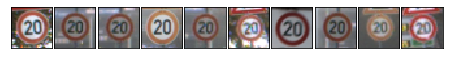

--------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                                1980 samples


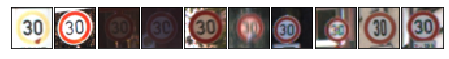

--------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                                2010 samples


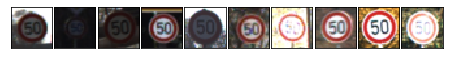

--------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                                1260 samples


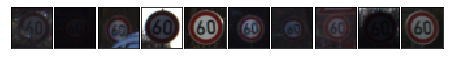

--------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                                1770 samples


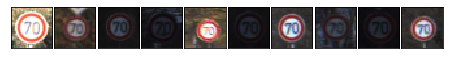

--------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                                1650 samples


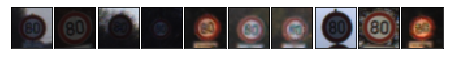

--------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                         360 samples


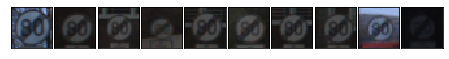

--------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                               1290 samples


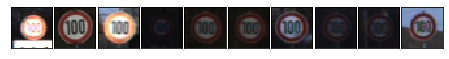

--------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                               1260 samples


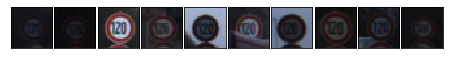

--------------------------------------------------------------------------------------

Class 9: No passing                                          1320 samples


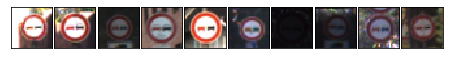

--------------------------------------------------------------------------------------

Class 10: No passing for vechiles over 3.5 metric tons        1800 samples


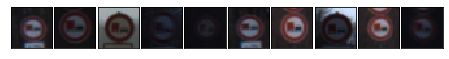

--------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection               1170 samples


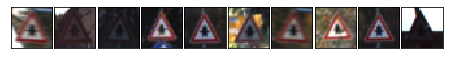

--------------------------------------------------------------------------------------

Class 12: Priority road                                       1890 samples


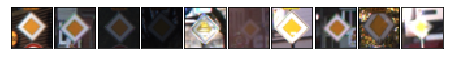

--------------------------------------------------------------------------------------

Class 13: Yield                                               1920 samples


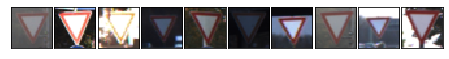

--------------------------------------------------------------------------------------

Class 14: Stop                                                690 samples


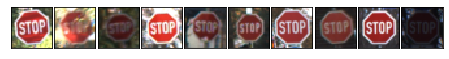

--------------------------------------------------------------------------------------

Class 15: No vechiles                                         540 samples


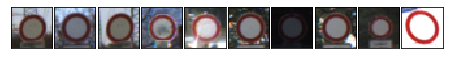

--------------------------------------------------------------------------------------

Class 16: Vechiles over 3.5 metric tons prohibited            360 samples


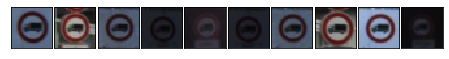

--------------------------------------------------------------------------------------

Class 17: No entry                                            990 samples


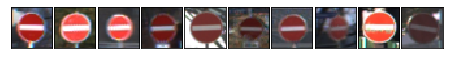

--------------------------------------------------------------------------------------

Class 18: General caution                                     1080 samples


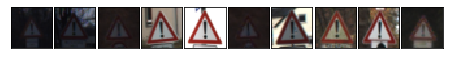

--------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                         180 samples


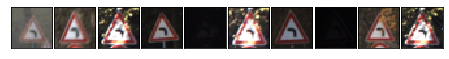

--------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                        300 samples


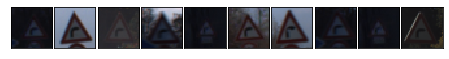

--------------------------------------------------------------------------------------

Class 21: Double curve                                        270 samples


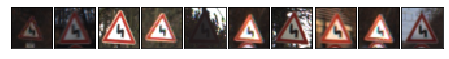

--------------------------------------------------------------------------------------

Class 22: Bumpy road                                          330 samples


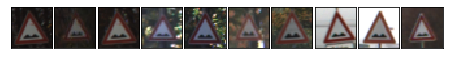

--------------------------------------------------------------------------------------

Class 23: Slippery road                                       450 samples


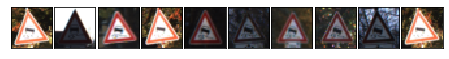

--------------------------------------------------------------------------------------

Class 24: Road narrows on the right                           240 samples


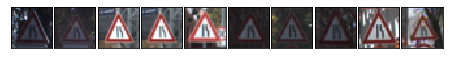

--------------------------------------------------------------------------------------

Class 25: Road work                                           1350 samples


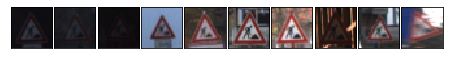

--------------------------------------------------------------------------------------

Class 26: Traffic signals                                     540 samples


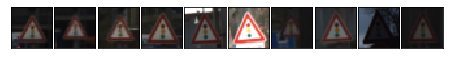

--------------------------------------------------------------------------------------

Class 27: Pedestrians                                         210 samples


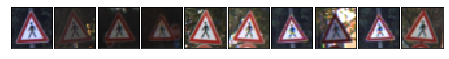

--------------------------------------------------------------------------------------

Class 28: Children crossing                                   480 samples


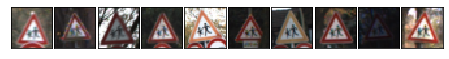

--------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                   240 samples


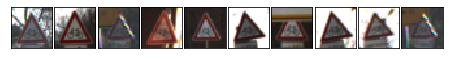

--------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                  390 samples


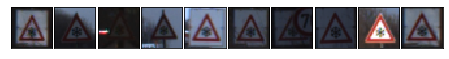

--------------------------------------------------------------------------------------

Class 31: Wild animals crossing                               690 samples


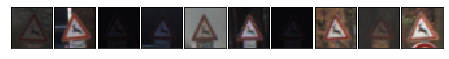

--------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                 210 samples


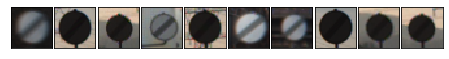

--------------------------------------------------------------------------------------

Class 33: Turn right ahead                                    599 samples


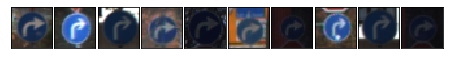

--------------------------------------------------------------------------------------

Class 34: Turn left ahead                                     360 samples


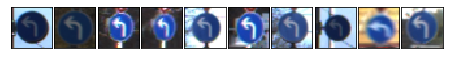

--------------------------------------------------------------------------------------

Class 35: Ahead only                                          1080 samples


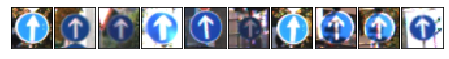

--------------------------------------------------------------------------------------

Class 36: Go straight or right                                330 samples


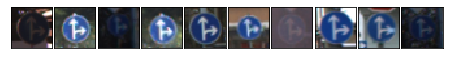

--------------------------------------------------------------------------------------

Class 37: Go straight or left                                 180 samples


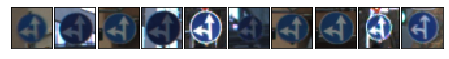

--------------------------------------------------------------------------------------

Class 38: Keep right                                          1860 samples


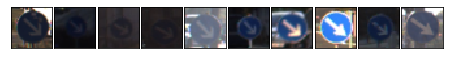

--------------------------------------------------------------------------------------

Class 39: Keep left                                           270 samples


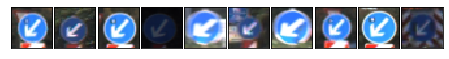

--------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                                300 samples


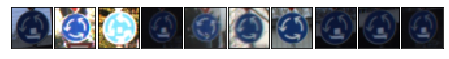

--------------------------------------------------------------------------------------

Class 41: End of no passing                                   210 samples


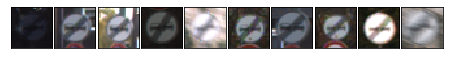

--------------------------------------------------------------------------------------

Class 42: End of no passing by vechiles over 3.5 metric tons  210 samples


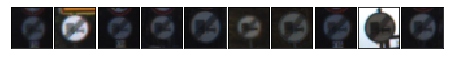

--------------------------------------------------------------------------------------



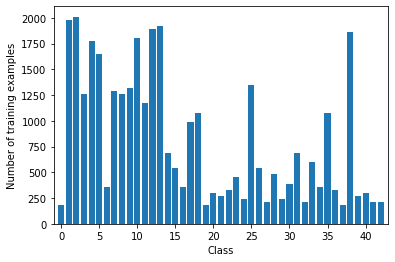

In [8]:
import random

col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = pyplot.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print("--------------------------------------------------------------------------------------\n")
    
pyplot.bar( np.arange( 43 ), class_counts, align='center' )
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

In [0]:
import sys
import time

def get_time_hhmmss(start = None):
    """
    Calculates time since `start` and formats as a string.
    """
    if start is None:
        return time.strftime("%Y/%m/%d %H:%M:%S")
    end = time.time()
    m, s = divmod(end - start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str   

def print_progress(iteration, total):
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

对称扩展数据集

In [0]:
def flip_extend(X, y):
    """
    Extends existing images dataset by flipping images of some classes. As some images would still belong
    to same class after flipping we extend such classes with flipped images. Images of other would toggle 
    between two classes when flipped, so for those we extend existing datasets as well.
    
    Parameters
    ----------
    X       : ndarray
              Dataset array containing feature examples.
    y       : ndarray, optional, defaults to `None`
              Dataset labels in index form.

    Returns
    -------
    A tuple of X and y.    
    """
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)

In [11]:
X_train, y_train = load_pickled_data(train_dataset_file, ['features', 'labels'])
print("Number of training examples in initial dataset =", X_train.shape[0])
_, class_counts = np.unique(y_train, return_counts = True)
X_train, y_train = flip_extend(X_train, y_train)
print("Number of training examples after horizontal flipping =", X_train.shape[0])

Number of training examples in initial dataset = 34799
Number of training examples after horizontal flipping = 59788


Convert the picture from RGB to Y channel

In [0]:
from sklearn.utils import shuffle
from skimage import exposure
import warnings 

num_classes = 43

def preprocess_dataset(X, y = None):
    print("Preprocessing dataset with {} examples:".format(X.shape[0]))

    #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)
        
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            X[i] = exposure.equalize_adapthist(X[i])
        print_progress(i + 1, X.shape[0])
        
    if y is not None:  
        # Convert to one-hot encoding. Convert back with `y = y.nonzero()[1]`
        y = np.eye(num_classes)[y]
        X, y = shuffle(X, y)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X, y

In [0]:
X_train_processed,y_train_processed = load_pickled_data(train_processed_dataset_file,['features', 'labels'])
X_valid_processed,y_valid_processed = load_pickled_data(valid_processed_dataset_file,['features', 'labels'])
X_test_processed,y_test_processsed = load_pickled_data(test_processed_dataset_file,['features', 'labels'])

Create the initial model with 3-stage convs features.

In [14]:
import keras
from keras.layers import Input,Conv2D,Activation,Dense,Flatten,concatenate,MaxPooling2D,Dropout
from keras import regularizers

cnn_input = Input(shape=(32,32,1), name='input')

conv1 = Conv2D(32,5,activation='relu',padding = 'same',name='conv1')(cnn_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
pool1 = Dropout(0.1)(pool1)

conv2 = Conv2D(64,5,activation='relu',padding = 'same',name='conv2')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
pool2 = Dropout(0.2)(pool2)

conv3 = Conv2D(128,5,activation='relu',padding = 'same',name='conv3')(pool2)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
pool3 = Dropout(0.3)(pool3)

pool1_1 = MaxPooling2D(pool_size=(4, 4))(pool1)

pool2_1 = MaxPooling2D(pool_size=(2, 2))(pool2)

conc = concatenate([pool1_1,pool2_1,pool3])
conc = Flatten()(conc)

FC = Dense(1024,activation='relu',name='FC',kernel_regularizer=regularizers.l2(0.0001))(conc)
FC = Dropout(0.5)(FC)

output = Dense(43,activation='softmax',name='output')(FC)
cnn_model = keras.Model(inputs=cnn_input,outputs=output)

cnn_model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 32)   832         input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 16, 16, 32)   0           max_pooling2d_1[0][0]            
____________________________________________________________________________________________

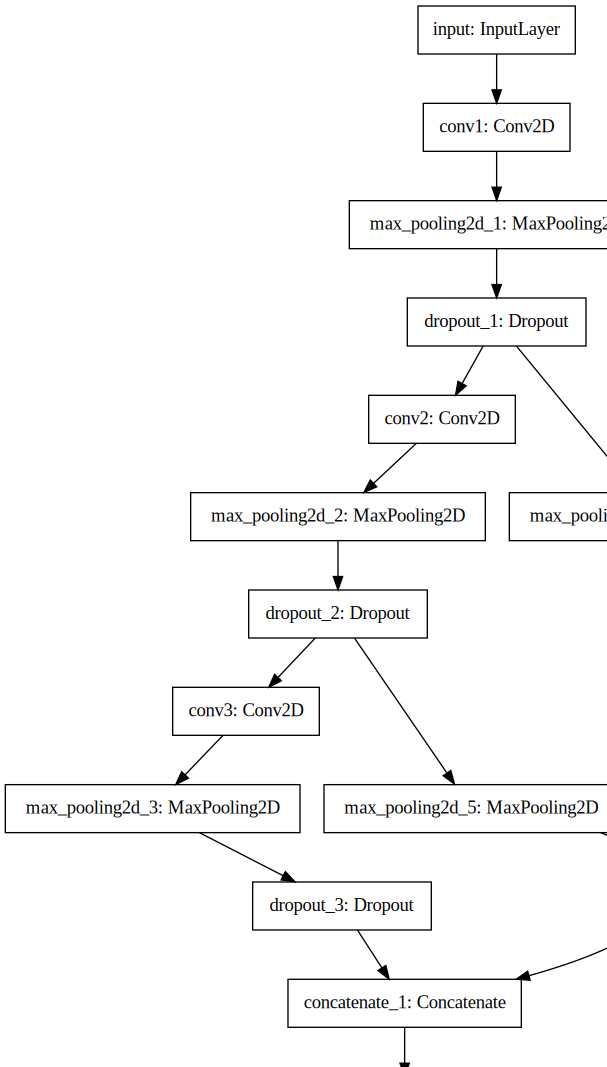

In [15]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(cnn_model).create(prog='dot', format='svg'))

In [0]:
seperase = np.argmax(y_train_processed,1)

In [17]:
len(seperase[seperase == 40])

600

In [0]:
weight = []
for i in range(43):
  weight.append(len(seperase)/len(seperase[seperase == i]))

In [19]:
weight

[332.15555555555557,
 15.097979797979798,
 29.745273631840796,
 47.45079365079365,
 33.77853107344633,
 18.117575757575757,
 166.07777777777778,
 46.347286821705424,
 47.45079365079365,
 45.2939393939394,
 33.215555555555554,
 25.550427350427352,
 7.908465608465608,
 15.569791666666667,
 86.64927536231885,
 27.67962962962963,
 166.07777777777778,
 15.097979797979798,
 27.67962962962963,
 124.55833333333334,
 124.55833333333334,
 221.43703703703704,
 90.5878787878788,
 132.86222222222221,
 249.11666666666667,
 44.28740740740741,
 55.35925925925926,
 284.7047619047619,
 124.55833333333334,
 249.11666666666667,
 76.65128205128205,
 86.64927536231885,
 142.35238095238094,
 62.34410844629823,
 62.34410844629823,
 27.67962962962963,
 117.23137254901961,
 117.23137254901961,
 28.069483568075118,
 28.069483568075118,
 99.64666666666666,
 284.7047619047619,
 284.7047619047619]

In [0]:
wd = {}
for i in range(43):
  wd[i] = weight[i]

In [21]:
wd

{0: 332.15555555555557,
 1: 15.097979797979798,
 2: 29.745273631840796,
 3: 47.45079365079365,
 4: 33.77853107344633,
 5: 18.117575757575757,
 6: 166.07777777777778,
 7: 46.347286821705424,
 8: 47.45079365079365,
 9: 45.2939393939394,
 10: 33.215555555555554,
 11: 25.550427350427352,
 12: 7.908465608465608,
 13: 15.569791666666667,
 14: 86.64927536231885,
 15: 27.67962962962963,
 16: 166.07777777777778,
 17: 15.097979797979798,
 18: 27.67962962962963,
 19: 124.55833333333334,
 20: 124.55833333333334,
 21: 221.43703703703704,
 22: 90.5878787878788,
 23: 132.86222222222221,
 24: 249.11666666666667,
 25: 44.28740740740741,
 26: 55.35925925925926,
 27: 284.7047619047619,
 28: 124.55833333333334,
 29: 249.11666666666667,
 30: 76.65128205128205,
 31: 86.64927536231885,
 32: 142.35238095238094,
 33: 62.34410844629823,
 34: 62.34410844629823,
 35: 27.67962962962963,
 36: 117.23137254901961,
 37: 117.23137254901961,
 38: 28.069483568075118,
 39: 28.069483568075118,
 40: 99.64666666666666,
 41: 

In [22]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_processed, y_train_processed, batch_size=128, epochs=60 ,validation_data=(X_valid_processed, y_valid_processed),class_weight=wd)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 59788 samples, validate on 4410 samples
Epoch 1/60





59788/59788 [==============================] - 16s 272us/step - loss: 65.4847 - acc: 0.5666 - val_loss: 0.5656 - val_acc: 0.8780
Epoch 2/60
59788/59788 [==============================] - 7s 110us/step - loss: 9.2624 - acc: 0.9192 - val_loss: 0.4137 - val_acc: 0.9447
Epoch 3/60
59788/59788 [==============================] - 7s 110us/step - loss: 5.0061 - acc: 0.9568 - val_loss: 0.3392 - val_acc: 0.9624
Epoch 4/60
59788/59788 [==============================] - 7s 111us/step - loss: 3.5926 - acc: 0.9692 - val_loss: 0.3324 - val_acc: 0.9678
Epoch 5/60
59788/59788 [==============================] - 7s 111us/step - loss: 2.6898 - acc: 0.9780 - val_loss: 0.3512 - val_acc: 0.9671
Epoch 6/60
59788/59788 [==============================] - 7s 110us/step - loss: 2.6366 - acc: 0.9771 - val_loss: 0.3603 - val_acc: 0.9721
Epoch 7/60
59788/

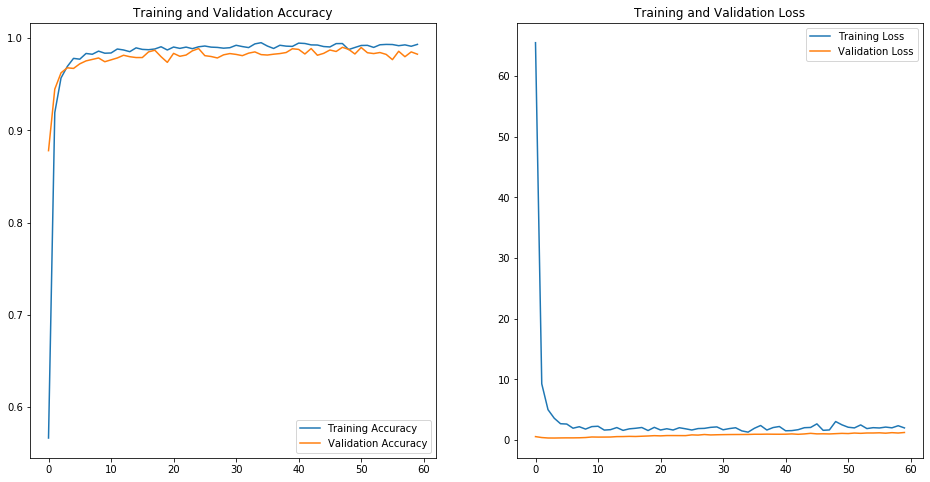

In [23]:
import matplotlib.pyplot as plt

acc = cnn_history.history['acc']
val_acc = cnn_history.history['val_acc']

loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
cnn_model.evaluate(X_test_processed, y_test_processsed)

12630/12630 [==============================] - 1s 76us/step


[1.253480608804964, 0.9668250197658251]

In [0]:
lenet_input = Input(shape=(32,32,1), name='input')

con1 = Conv2D(32,5,activation='relu',name='con1')(lenet_input)
poo1 = MaxPooling2D(pool_size=(2,2))(con1)
poo1 = Dropout(0.1)(poo1)

con2 = Conv2D(10,5,activation='relu',name='con2')(poo1)
poo2 = MaxPooling2D(pool_size=(2,2))(con2)
poo2 = Dropout(0.2)(poo2)

fla = Flatten()(poo2)
Fc = Dense(120,activation='relu',kernel_regularizer=regularizers.l2(0.0001))(fla)
Fc = Dropout(0.5)(Fc)

out = Dense(43,activation='softmax')(Fc)
lenet_model = keras.Model(inputs=lenet_input,outputs=out)


In [26]:
lenet_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 32, 32, 1)         0         
_________________________________________________________________
con1 (Conv2D)                (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
con2 (Conv2D)                (None, 10, 10, 10)        8010      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 10)          0   

In [27]:
lenet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
lenet_history = lenet_model.fit(X_train_processed, y_train_processed, batch_size=128, epochs=60 ,validation_data=(X_valid_processed, y_valid_processed))

Train on 59788 samples, validate on 4410 samples
Epoch 1/60
59788/59788 [==============================] - 3s 55us/step - loss: 1.8118 - acc: 0.5094 - val_loss: 0.8805 - val_acc: 0.7594
Epoch 2/60
59788/59788 [==============================] - 3s 46us/step - loss: 0.7329 - acc: 0.7777 - val_loss: 0.4904 - val_acc: 0.8617
Epoch 3/60
59788/59788 [==============================] - 3s 45us/step - loss: 0.5187 - acc: 0.8420 - val_loss: 0.3424 - val_acc: 0.9075
Epoch 4/60
59788/59788 [==============================] - 3s 45us/step - loss: 0.4055 - acc: 0.8781 - val_loss: 0.2840 - val_acc: 0.9281
Epoch 5/60
59788/59788 [==============================] - 3s 45us/step - loss: 0.3451 - acc: 0.8972 - val_loss: 0.2207 - val_acc: 0.9440
Epoch 6/60
59788/59788 [==============================] - 3s 45us/step - loss: 0.3022 - acc: 0.9115 - val_loss: 0.2065 - val_acc: 0.9517
Epoch 7/60
59788/59788 [==============================] - 3s 45us/step - loss: 0.2632 - acc: 0.9254 - val_loss: 0.1763 - val_acc:

In [0]:
acc = lenet_history.history['acc']
val_acc = lenet_history.history['val_acc']

loss = lenet_history.history['loss']
val_loss = lenet_history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
lenet_model.evaluate(X_test_processed, y_test_processsed)

12630/12630 [==============================] - 1s 88us/step


[0.1633381033241041, 0.9627870150435471]

In [0]:
lenet_model.save('lenet.h5')

In [0]:
cnn_model.save('cnn.h5')

In [0]:
import matplotlib.gridspec as gridspec
from skimage import io
import os
    
# Load images from .png files to `X_custom` NumPy array
X_custom = np.empty([0, 32, 32, 3], dtype = np.int32)
for i in range(38):
    image = io.imread(os.getcwd() + '/traffic-signs-data/custom/' + "example_{0:0>5}".format(i + 1) + '.png')
    X_custom = np.append(X_custom, [image[:, :, :3]], axis = 0)

# Provide labels of the captured images:
y_custom = np.array([
    21, # "example_00001"
    39, # "example_00002"
    17, # "example_00003"
    17, # "example_00004"
    17, # "example_00005"
    39, # "example_00006"
    39, # "example_00007"
    40, # "example_00008"
    40, # "example_00009"
    34, # "example_00010"
    28, # "example_00011"
    39, # "example_00012"
    0, # "example_00013"
    17, # "example_00014"
    38, # "example_00015"
    13, # "example_00016"
    40, # "example_00017"
    13, # "example_00018"
    38, # "example_00019"
    38, # "example_00020"
    11, # "example_00021"
    0, # "example_00022"
    28, # "example_00023"
    0, # "example_00024"
    99, # "example_00025"
    99, # "example_00026"
    99, # "example_00027"
    32, # "example_00028"
    40, # "example_00029"
    28, # "example_00030"
    40, # "example_00031"
    40, # "example_00032"
    28, # "example_00033"
    24, # "example_00034"
    0, # "example_00035"
    0, # "example_00036"
    0, # "example_00037"
    0 # "example_00038"
])

# Preprocess and get predictions based on the current model
X_custom, _ = preprocess_dataset(X_custom)

Preprocessing dataset with 38 examples:
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100%


In [0]:
predictions = cnn_model.predict(X_custom)

In [0]:
def plot_image_statistics(predictions, best_k, index):
    """
    Plots prediction statistics for a single example.

    Parameters
    ----------
    predictions   : 
                    Array of predictions.
    index         : 
                    Index of the example we need to plot statistics for
    """
    # Prepare original and preprocessed images
    original = io.imread(os.getcwd() + '/traffic-signs-data/custom/' + "example_{0:0>5}".format(index + 1) + '.png')
    preprocessed = X_custom[index].reshape(32, 32)
        
    # Prepare the grid
    pyplot.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    pyplot.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    pyplot.imshow(original)
    pyplot.axis('off')

    # Plot preprocessed image
    pyplot.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    pyplot.imshow(preprocessed, cmap='gray')
    pyplot.axis('off')

    # Plot predictions
    pyplot.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    pyplot.barh(np.arange(5)+.5, predictions[index][-5:][::-1], align='center')
    pyplot.yticks(np.arange(5)+.5, signnames[best_k[index][::-1].astype(int)])
    pyplot.tick_params(axis='both', which='both', labelleft=False, labelright=True, labeltop=False, labelbottom=False)
    
    pyplot.show()

In [0]:
best_5 = np.argsort(predictions, axis=1)[:,-5:]
best_5

array([[18, 11, 24, 19, 21],
       [32,  3,  5, 33, 39],
       [22, 34,  9, 15, 17],
       [12, 10, 34,  9, 17],
       [13,  9, 34, 12, 17],
       [ 5, 33, 32, 15, 39],
       [38,  2, 13, 15, 39],
       [33, 17,  1, 12, 40],
       [11, 15,  3, 12, 40],
       [ 8, 15,  1, 35, 34],
       [24,  3, 30, 28, 29],
       [17, 18, 10, 42, 39],
       [ 4,  3,  5,  1,  0],
       [12, 14, 13, 34, 17],
       [17, 13, 39, 12, 38],
       [ 1,  2, 12, 15, 13],
       [ 3, 40,  2,  5,  7],
       [ 5, 12,  1, 15, 13],
       [31, 39, 15, 12, 38],
       [13, 31, 12, 39, 38],
       [ 1, 30, 20, 26, 11],
       [11,  5,  3,  1,  0],
       [24, 27, 29, 11, 28],
       [ 4,  5,  3,  1,  0],
       [11, 29, 28, 30, 24],
       [10, 17, 12, 16,  9],
       [ 3,  7,  8, 16,  9],
       [ 4, 38,  5,  2,  1],
       [ 8,  2,  7, 12, 40],
       [28,  3, 29, 30, 11],
       [ 4,  1, 34, 15, 40],
       [38,  5,  2,  1, 40],
       [24, 18, 28, 27, 11],
       [ 4, 19, 21, 24, 18],
       [ 5, 19

In [0]:
for i in range(len(best_5)):
  for j in range(len(best_5[i])):
    best_5[i][j] += 1

In [0]:
best_5

array([[18, 11, 24, 19, 21],
       [32,  3,  5, 33, 39],
       [22, 34,  9, 15, 17],
       [12, 10, 34,  9, 17],
       [13,  9, 34, 12, 17],
       [ 5, 33, 32, 15, 39],
       [38,  2, 13, 15, 39],
       [33, 17,  1, 12, 40],
       [11, 15,  3, 12, 40],
       [ 8, 15,  1, 35, 34],
       [24,  3, 30, 28, 29],
       [17, 18, 10, 42, 39],
       [ 4,  3,  5,  1,  0],
       [12, 14, 13, 34, 17],
       [17, 13, 39, 12, 38],
       [ 1,  2, 12, 15, 13],
       [ 3, 40,  2,  5,  7],
       [ 5, 12,  1, 15, 13],
       [31, 39, 15, 12, 38],
       [13, 31, 12, 39, 38],
       [ 1, 30, 20, 26, 11],
       [11,  5,  3,  1,  0],
       [24, 27, 29, 11, 28],
       [ 4,  5,  3,  1,  0],
       [11, 29, 28, 30, 24],
       [10, 17, 12, 16,  9],
       [ 3,  7,  8, 16,  9],
       [ 4, 38,  5,  2,  1],
       [ 8,  2,  7, 12, 40],
       [28,  3, 29, 30, 11],
       [ 4,  1, 34, 15, 40],
       [38,  5,  2,  1, 40],
       [24, 18, 28, 27, 11],
       [ 4, 19, 21, 24, 18],
       [ 5, 19

In [0]:
best_5[0][::-1]

array([21, 19, 24, 11, 18])

In [0]:
predictions[0]

array([8.03983106e-36, 5.52253736e-18, 3.61513923e-20, 1.82916607e-19,
       1.33516226e-18, 1.29839851e-21, 9.18280316e-26, 3.23891798e-22,
       3.76521603e-15, 7.64964929e-30, 9.11563331e-30, 5.93063250e-13,
       3.52153203e-21, 1.10596706e-20, 4.62390020e-29, 3.05179075e-25,
       7.40092701e-38, 1.05475698e-29, 3.51741124e-13, 5.12229178e-07,
       2.46888495e-29, 9.99999523e-01, 6.35563396e-23, 4.79142147e-19,
       2.06511142e-09, 3.05759751e-15, 3.24691039e-14, 2.25227322e-20,
       1.21273150e-21, 6.35444051e-17, 3.60088910e-15, 7.39903344e-16,
       9.86665722e-30, 9.33772286e-21, 3.66820513e-20, 4.55989904e-20,
       7.67006244e-33, 2.33388285e-23, 2.58127607e-22, 6.21872575e-20,
       4.39075573e-26, 2.62403630e-37, 5.50584516e-37], dtype=float32)

In [0]:
for i in range(len(predictions)):
  predictions[i].sort()

In [0]:
predictions[0][-5:][::-1]

array([9.9999952e-01, 5.1222918e-07, 2.0651114e-09, 5.9306325e-13,
       3.5174112e-13], dtype=float32)

Actual class:  Double curve


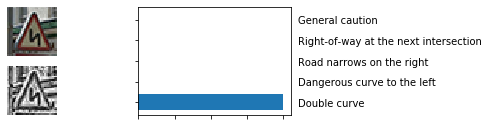

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


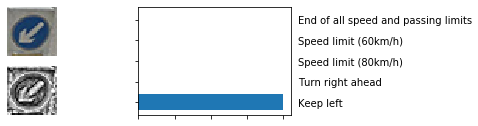

---------------------------------------------------------------------------------------------------

Actual class:  No entry


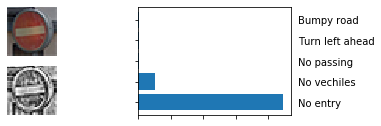

---------------------------------------------------------------------------------------------------

Actual class:  No entry


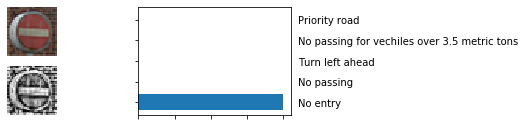

---------------------------------------------------------------------------------------------------

Actual class:  No entry


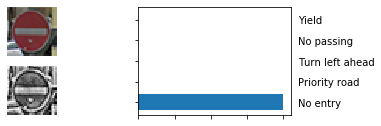

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


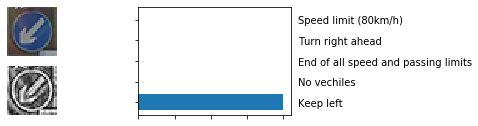

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


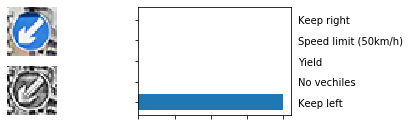

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


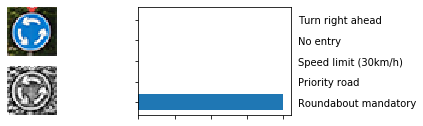

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


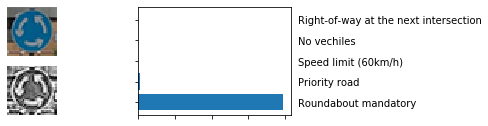

---------------------------------------------------------------------------------------------------

Actual class:  Turn left ahead


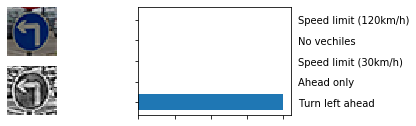

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


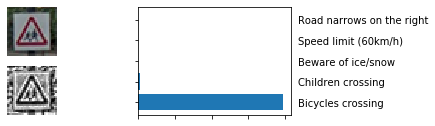

---------------------------------------------------------------------------------------------------

Actual class:  Keep left


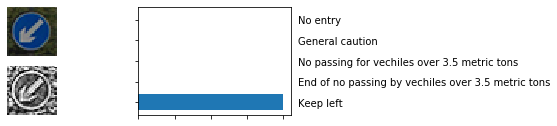

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


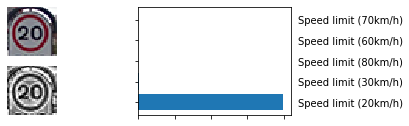

---------------------------------------------------------------------------------------------------

Actual class:  No entry


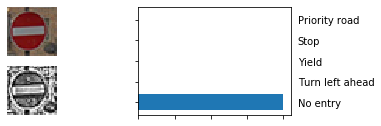

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


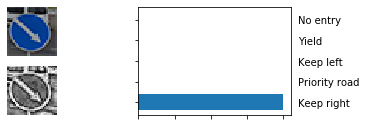

---------------------------------------------------------------------------------------------------

Actual class:  Yield


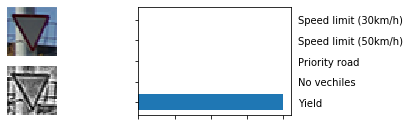

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


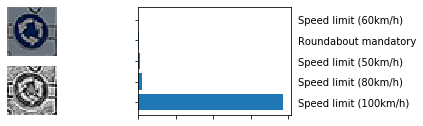

---------------------------------------------------------------------------------------------------

Actual class:  Yield


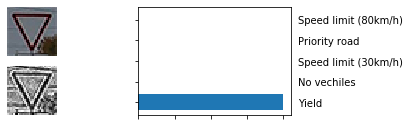

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


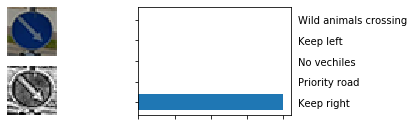

---------------------------------------------------------------------------------------------------

Actual class:  Keep right


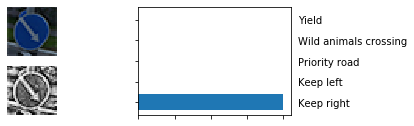

---------------------------------------------------------------------------------------------------

Actual class:  Right-of-way at the next intersection


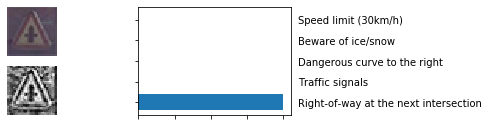

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


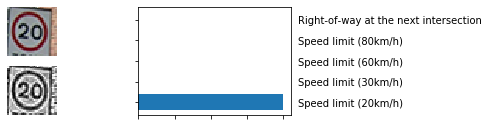

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


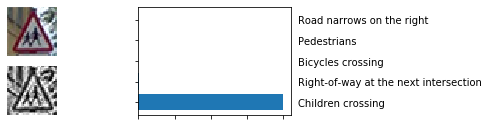

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


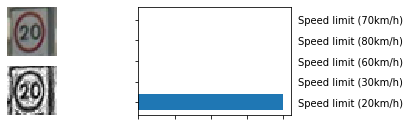

---------------------------------------------------------------------------------------------------

Actual class:  None


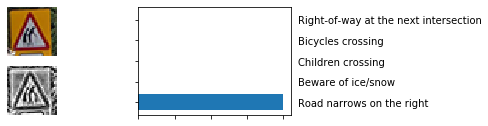

---------------------------------------------------------------------------------------------------

Actual class:  None


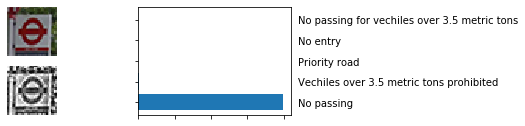

---------------------------------------------------------------------------------------------------

Actual class:  None


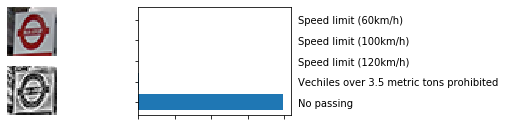

---------------------------------------------------------------------------------------------------

Actual class:  End of all speed and passing limits


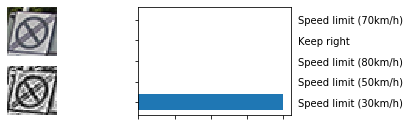

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


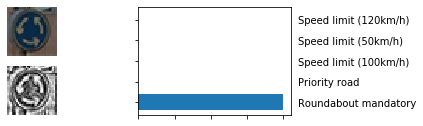

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


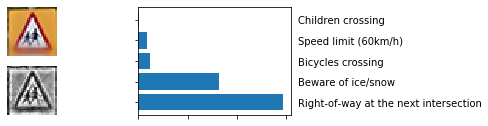

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


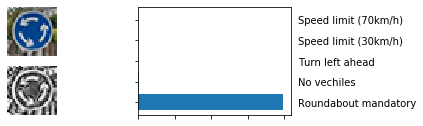

---------------------------------------------------------------------------------------------------

Actual class:  Roundabout mandatory


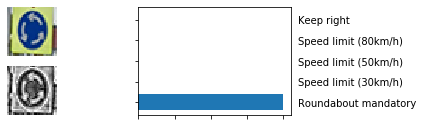

---------------------------------------------------------------------------------------------------

Actual class:  Children crossing


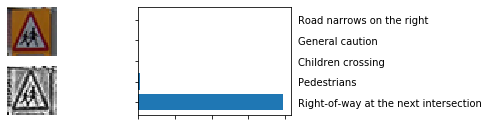

---------------------------------------------------------------------------------------------------

Actual class:  Road narrows on the right


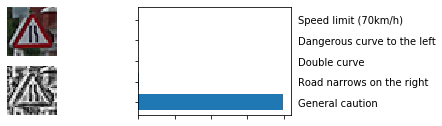

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


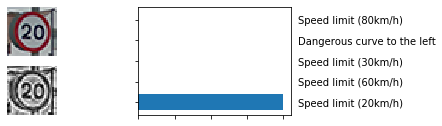

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


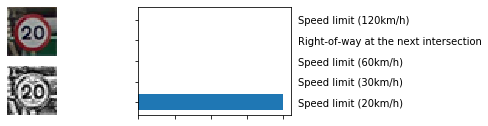

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


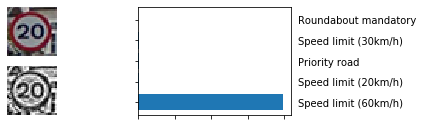

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (20km/h)


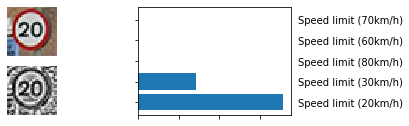

---------------------------------------------------------------------------------------------------



In [0]:
for i in range(38):
    print("Actual class: ", signnames[y_custom[i]] if y_custom[i] != 99 else "None")
    plot_image_statistics(predictions,best_5, i)
    print("---------------------------------------------------------------------------------------------------\n")

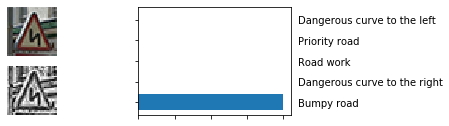

In [0]:
plot_image_statistics(predictions,best_5, 0)

In [0]:
best_5[0]

array([19, 12, 25, 20, 22])

In [0]:
signnames[21]

'Double curve'